In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (GridSearchCV,
                                     cross_val_score,
                                     StratifiedKFold, 
                                     learning_curve)

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
ids = test['PassengerId']
print('Train shape : ',train.shape)
print('Test shape : ',test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train['Embarked'].fillna('S',inplace=True)
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

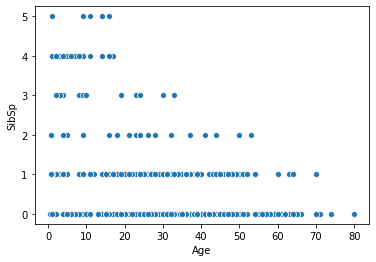

In [9]:
sns.scatterplot(x='Age',y='SibSp',data=train)

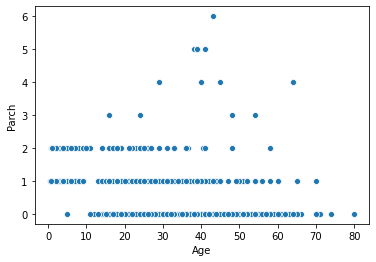

In [10]:
sns.scatterplot(x='Age',y='Parch',data=train)

In [11]:
train[['Age','SibSp']].groupby('SibSp').median()

,Age
SibSp,
0,29.0
1,30.0
2,23.0
3,9.5
4,6.5
5,11.0
8,NaN


In [12]:
train[['Age','SibSp']].groupby('SibSp').mean()

,Age
SibSp,
0,31.397558
1,30.089727
2,22.620000
3,13.916667
4,7.055556
5,10.200000
8,NaN


In [13]:
train[['Age','Parch']].groupby('Parch').median()

,Age
Parch,
0,30.0
1,23.0
2,16.5
3,24.0
4,42.5
5,39.0
6,43.0


In [14]:
train[['Age','Parch']].groupby('Parch').mean()

,Age
Parch,
0,32.178503
1,24.422000
2,17.216912
3,33.200000
4,44.500000
5,39.200000
6,43.000000


In [15]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [16]:
print('Mean of age is : ',train['Age'].mean())
print('Median of age is : ',train['Age'].median())

Mean of age is :  29.69911764705882
Median of age is :  28.0


In [17]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [18]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

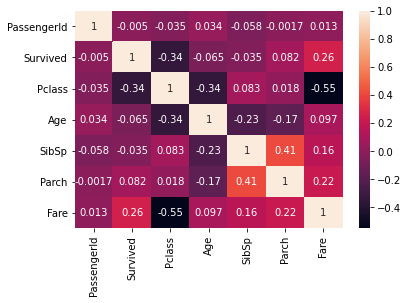

In [19]:
sns.heatmap(train.corr(),annot=True)

In [20]:
train['FamilySize'] = train['Parch'] + train['SibSp'] +1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


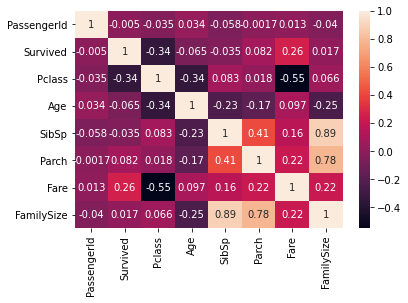

In [21]:
sns.heatmap(train.corr(),annot=True)

In [22]:
train['Single'] = train['FamilySize'].map(lambda i: 1 if i==1 else 0)
train['Small'] = train['FamilySize'].map(lambda i: 1 if i==2 else 0)
train['Medium'] = train['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
train['Large'] = train['FamilySize'].map(lambda i: 1 if i>4 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Medium,Large
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0


In [23]:
train['Sex'] = train['Sex'].map(lambda i : 1 if i=='male' else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Medium,Large
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0


In [24]:
train['Embarked_S'] = train['Embarked'].map(lambda i: 1 if i=='S' else 0)
train['Embarked_C'] = train['Embarked'].map(lambda i: 1 if i=='C' else 0)
train['Embarked_Q'] = train['Embarked'].map(lambda i: 1 if i=='Q' else 0)
train.drop(['Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0


In [25]:
titles = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [26]:
train['Title'] = pd.Series(titles)
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [27]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Capt              1
Jonkheer          1
Mme               1
the Countess      1
Lady              1
Ms                1
Sir               1
Name: Title, dtype: int64

In [28]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
train['Title'] = train['Title'].replace(rare_surnames,'Rare')
train['Title'] = train['Title'].map(mapping_other_surnames)
train['Title']=train['Title'].astype(int)


In [29]:
train['Title'].head()

0    1
1    2
2    2
3    2
4    1
Name: Title, dtype: int64

In [30]:
train.drop(['Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0,2
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0,1


In [31]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0,2
3,1,1,0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0,2
4,0,3,1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0,1


In [33]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [34]:
train['Cabin'][1][0]

'C'

In [35]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
train['Cabin'].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin, dtype: object

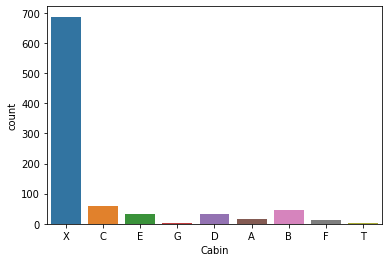

In [36]:
sns.countplot(train['Cabin'])

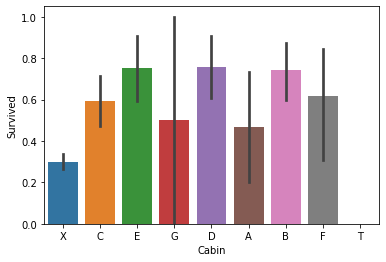

In [37]:
sns.barplot(x='Cabin',y='Survived',data=train)

In [38]:
train['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [39]:
train = pd.get_dummies(train,columns=['Cabin'],prefix='Cabin')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,2,0,1,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,2,0,1,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,373450,8.0500,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [40]:
train.drop(['Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,1,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
train.shape

(891, 25)

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [44]:
test[test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [45]:
test.shape

(418, 11)

In [46]:
test.drop(['PassengerId'],axis=1,inplace=True)

In [47]:
titles = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = pd.Series(titles)

In [48]:
test['Title'].isna().sum()

0

In [49]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
test['Title'] = test['Title'].replace(rare_surnames,'Rare')
test['Title'] = test['Title'].map(mapping_other_surnames)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [50]:
test.drop(['Name'],axis=1,inplace=True)

In [51]:
test.shape

(418, 10)

In [52]:
test['Sex'] = test['Sex'].map(lambda i : 1 if i=='male' else 0)

test['Embarked_S'] = test['Embarked'].map(lambda i: 1 if i=='S' else 0)
test['Embarked_C'] = test['Embarked'].map(lambda i: 1 if i=='C' else 0)
test['Embarked_Q'] = test['Embarked'].map(lambda i: 1 if i=='Q' else 0)
test.drop(['Embarked'],axis=1,inplace=True)

test.drop(['Ticket'],axis=1,inplace=True)

test['FamilySize'] = test['Parch'] + test['SibSp'] +1
test['Single'] = test['FamilySize'].map(lambda i: 1 if i==1 else 0)
test['Small'] = test['FamilySize'].map(lambda i: 1 if i==2 else 0)
test['Medium'] = test['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
test['Large'] = test['FamilySize'].map(lambda i: 1 if i>4 else 0)

test['Age'].fillna(test['Age'].median(),inplace=True)

In [53]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])
test = pd.get_dummies(test,columns=['Cabin'],prefix='Cabin')
print(test.shape)

(418, 23)


In [54]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Single,Small,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,3,1,34.5,0,0,7.8292,1.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
1,3,0,47.0,1,0,7.0000,2.0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1
2,2,1,62.0,0,0,9.6875,1.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
3,3,1,27.0,0,0,8.6625,1.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,3,0,22.0,1,1,12.2875,2.0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,1


In [55]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'FamilySize', 'Single', 'Small', 'Medium',
       'Large', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_X'],
      dtype='object')

In [56]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Single', 'Small', 'Medium', 'Large', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'Title', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X'],
      dtype='object')

In [57]:
test.isna().sum().sort_values(ascending=False)

Title         1
Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [58]:
train.isna().sum().sort_values(ascending=False)

Cabin_X       0
Large         0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Single        0
Small         0
Medium        0
Embarked_S    0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Title         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Survived      0
dtype: int64

In [59]:
test[test['Title'].isna()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Single,Small,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
414,1,0,39.0,0,0,108.9,NaN,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0


In [60]:
test['Title'].fillna('1',inplace=True)

In [61]:
test.isna().sum().sort_values(ascending=False)

Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [62]:
test['Cabin_T']=0

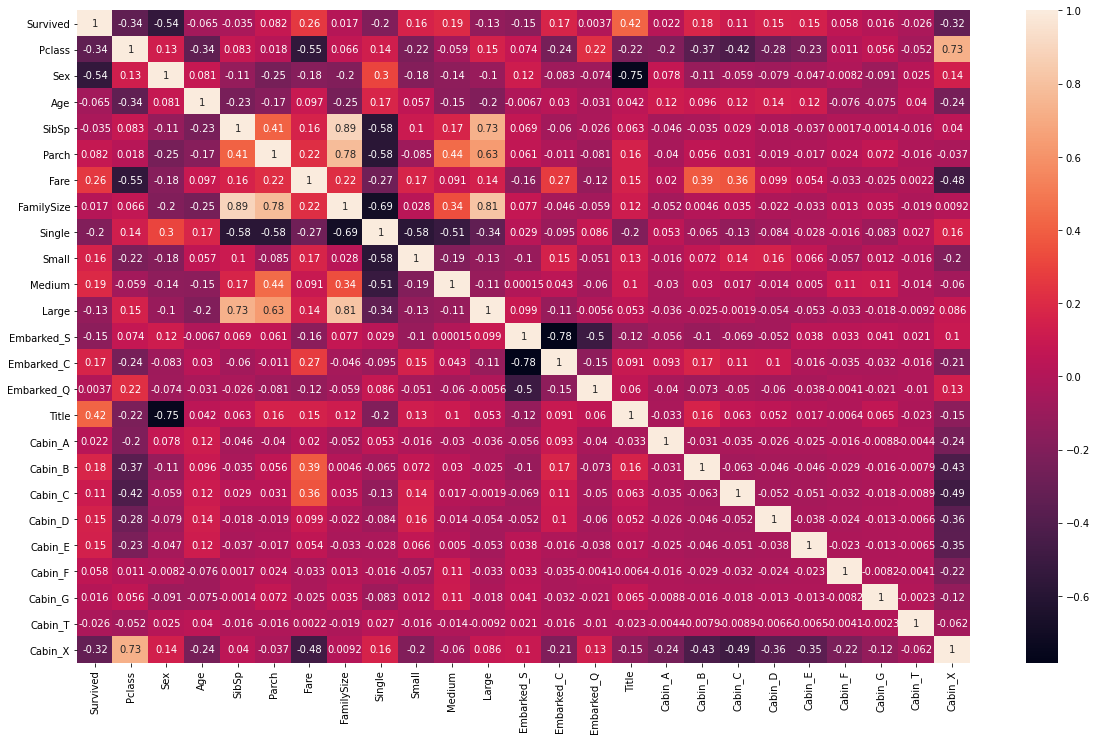

In [63]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True)

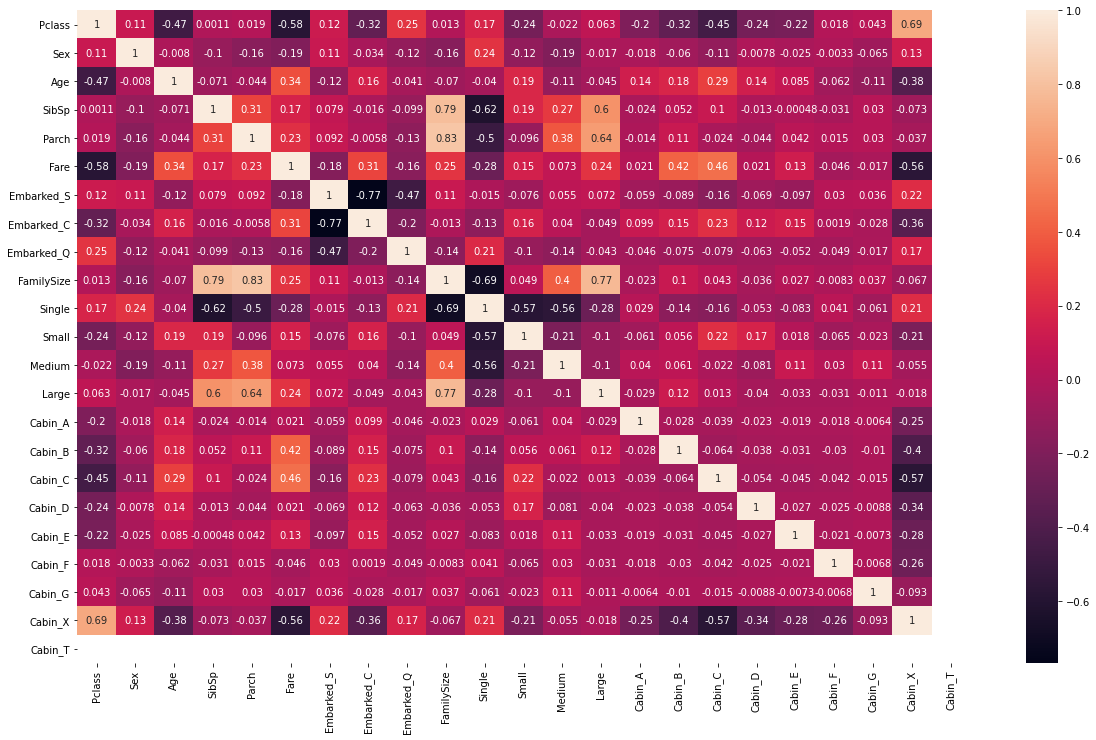

In [64]:
plt.figure(figsize=(20,12))
sns.heatmap(test.corr(),annot=True)

In [65]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Single,Small,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Cabin_T
0,3,1,34.5,0,0,7.8292,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,2,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0


In [66]:
len(train)

891

In [67]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
print('Shape of X_train is : ',X_train.shape)
print('Shape of Y_train is :',y_train.shape)

Shape of X_train is :  (891, 24)
Shape of Y_train is : (891,)


In [68]:
kfold = StratifiedKFold(n_splits=10)
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto'),
    MLPClassifier(learning_rate='adaptive')
]

In [69]:
import warnings
warnings.filterwarnings('ignore')
results = []
for classifier in classifiers:
  results.append(cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=kfold,scoring='accuracy'))

In [70]:
mean = []
std = []
for result in results:
  mean.append(result.mean())
  std.append(result.std())

result_df = pd.DataFrame({'Cross Validation Mean':mean,'Cross Validation Error':std,'Algorithms':['Suppor vector classifier',
                                                                                                  'Decision Tree classifier',
                                                                                                  'AdaBoosting classifier',
                                                                                                  'Random forest classifier',
                                                                                                  'Gradient boosting',
                                                                                                  'K Neighbours classifier',
                                                                                                  'Logistic Regression classifier',
                                                                                                  'Linear discriminant analysis',
                                                                                                  'Multi layer perceptron classifier']})
result_df

,Cross Validation Mean,Cross Validation Error,Algorithms
0,0.688065,0.047808,Suppor vector classifier
1,0.786829,0.048554,Decision Tree classifier
2,0.783496,0.063039,AdaBoosting classifier
3,0.807004,0.042022,Random forest classifier
4,0.824944,0.044870,Gradient boosting
5,0.728489,0.041462,K Neighbours classifier
6,0.812609,0.031516,Logistic Regression classifier
7,0.815955,0.024564,Linear discriminant analysis
8,0.757653,0.034905,Multi layer perceptron classifier


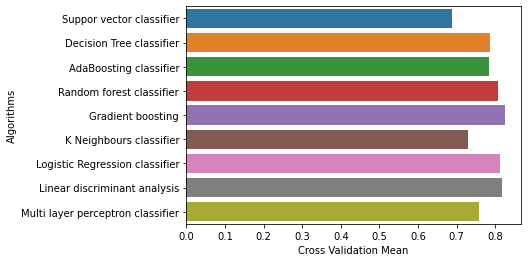

In [71]:
sns.barplot(x='Cross Validation Mean',y='Algorithms',data=result_df)


In [72]:
kfold = StratifiedKFold(n_splits=10)
classifiers = [
    AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(),
    LogisticRegression()
]

In [73]:
ada_grid = {'base_estimator__criterion':['gini','entropy'],
           'base_estimator__splitter':['best','random'],
           'algorithm':['SAMME','SAMME.R'],
           'n_estimators':[1,2,3],
           'learning_rate':[0.01,0.1,0.5,1,1.3]}
random_grid = {'max_depth':[None],
              'max_features':[1,3,5,10,20],
              'min_samples_split':[2,4,6,8],
              'min_samples_leaf':[1,2,3,5],
              'n_estimators':[50,100,200],
              'criterion':['gini']}
gradient_grid = {'loss':['deviance'],  #exponential
                'learning_rate':[1,1.3],  #1,1.3
                'n_estimators':[200,250],  # 100
                'criterion':['mae','friedman_mse'],  #'friedman_mse'
                'min_samples_split':[3], #0.5,4
                'min_samples_leaf':[1,2], 
                'max_depth':[3],
                'max_features':['sqrt']}
logistic_grid = {'penalty':['l2'],
                'C':[0.4,0.5,0.6,0.7],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter':[100,200,250,300]}

main_grid = [ada_grid,random_grid,gradient_grid,logistic_grid]

In [74]:
grid_results = list()
grid_best_estimator = list()

In [75]:
grid_ = GridSearchCV(estimator=classifiers[0],param_grid=main_grid[0],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [76]:
grid_results


[0.8036329588014981]

In [77]:
grid_best_estimator


[AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=None,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
       

In [78]:
grid_ = GridSearchCV(estimator=classifiers[1],param_grid=main_grid[1],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [79]:
grid_results

[0.8036329588014981, 0.8373158551810238]

In [80]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=None,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
       

In [81]:
grid_ = GridSearchCV(estimator=classifiers[3],param_grid=main_grid[3],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [82]:
grid_results

[0.8036329588014981, 0.8373158551810238, 0.8193258426966292]

In [83]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=None,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
       

In [84]:
grid_ = GridSearchCV(estimator=classifiers[2],param_grid=main_grid[2],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [85]:
grid_results

[0.8036329588014981,
 0.8373158551810238,
 0.8193258426966292,
 0.8339575530586766]

In [86]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=None,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
       

In [87]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('Random_forest',grid_best_estimator[1]),
                                      ('Ada_boost',grid_best_estimator[0]),
                                      ('Gradient_boost',grid_best_estimator[3]),
                                      ('Logistic',grid_best_estimator[2])],
                         voting='hard')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=20,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=8,
                                                     min_weight_fraction_leaf=0.0,
 

In [88]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Single,Small,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Cabin_T
0,3,1,34.5,0,0,7.8292,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,2,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0


In [89]:
predictions = pd.Series(voting.predict(test),name='Survived')
results = pd.concat([ids,predictions],axis=1)
results.to_csv('Predictions.csv',index=False)